In [3]:
# Missing Value Imputation For Numeric Variables

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()




pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

FILE   = "HMEQ_Loss.csv"


df = pd.read_csv( FILE, encoding="ISO-8859-1" )

dt = df.dtypes

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"


#print( dt )

objList = []
numList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )


print(" OBJECTS ")
print(" ------- ")
for i in objList :
    print( i )
print(" ------- ")


print(" NUMBER ")
print(" ------- ")
for i in numList :
    print( i )
print(" ------- ")







"""
FILL IN MISSING WITH THE CATEGORY "MISSING"
"""
#How many objects are in the list
for i in objList :
    if df[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    g = df.groupby( NAME )
    df = df.drop( i, axis=1 )


dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )



'''
EXPLORE THE CATEGORICAL / OBJECT VARIABLES
'''

# df["y_JOB_7"] = (df.IMP_JOB.isin( ["a_Other"] ) + 0 )
# df["y_JOB_6"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING"] ) + 0)
# df["y_JOB_5"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office"] ) + 0)
# df["y_JOB_4"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales"] ) + 0)
# df["y_JOB_3"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales","e_Mgr"] ) + 0)
# df["y_JOB_2"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales","e_Mgr","f_ProfExe"] ) + 0)
# df["y_JOB_1"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales","e_Mgr","f_ProfExe","g_Self"] ) + 0)
# df = df.drop( "IMP_JOB", axis=1 )
 

dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )


for i in objList :
    thePrefix = "z_" + i
    y = pd.get_dummies( df[i], prefix=thePrefix, drop_first=True )   
    #y = pd.get_dummies( df[i], prefix=thePrefix )   
    df = pd.concat( [df, y], axis=1 )
    #df = df.drop( i, axis=1 )



g = df.groupby("IMP_JOB")
i = "VALUE"
print( g[i].median() )

i = "VALUE"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Mgr"]), IMP ] = 767
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Office"]), IMP ] = 948
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Other"]), IMP ] = 2388
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Doctor"]), IMP ] = 1276
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["ProfExe"]), IMP ] = 109
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Sales"]), IMP ] = 193
df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)


for i in numList :
    if df[i].isna().sum() == 0 : continue
    FLAG = "M_" + i
    IMP = "IMP_" + i
    #print(i)
    #print( df[i].isna().sum() )
    #print( FLAG )
    #print( IMP )
    #print(" ------- ")
    df[ FLAG ] = df[i].isna() + 0
    df[ IMP ] = df[ i ]
    df.loc[ df[IMP].isna(), IMP ] = df[i].median()
    df = df.drop( i, axis=1 )



for i in objList:
    df = df.drop( i, axis=1 )




SomeData = df.head().T
for r in range( SomeData.shape[0] ):
    print( SomeData.iloc[r,] )
    print("---\n\n")

 OBJECTS 
 ------- 
REASON
JOB
 ------- 
 NUMBER 
 ------- 
LOAN
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC
 ------- 
IMP_JOB
MISSING     78227.0
Mgr        101258.0
Office      89094.5
Other       76599.5
ProfExe    110007.0
Sales       84473.5
Self       130631.0
Name: VALUE, dtype: float64
0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: TARGET_BAD_FLAG, dtype: float64
---


0     641.0
1    1109.0
2     767.0
3    1425.0
4       NaN
Name: TARGET_LOSS_AMT, dtype: float64
---


0    1100.0
1    1300.0
2    1500.0
3    1500.0
4    1700.0
Name: LOAN, dtype: float64
---


0    1.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: z_IMP_REASON_HomeImp, dtype: float64
---


0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: z_IMP_REASON_MISSING, dtype: float64
---


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: z_IMP_JOB_Mgr, dtype: float64
---


0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: z_IMP_JOB_Office, dtype: float64
---


0    1.0
1    1.0
2    1.0
3    0.0
4    0.

   LOAN  M_VALUE  IMP_VALUE  M_MORTDUE  IMP_MORTDUE  M_YOJ  IMP_YOJ  M_DEROG  \
0  1100        0    39025.0          0      25860.0      0     10.5        0   
1  1300        0    68400.0          0      70053.0      0      7.0        0   
2  1500        0    16700.0          0      13500.0      0      4.0        0   
3  1500        1    89235.5          1      65019.0      1      7.0        1   
4  1700        0   112000.0          0      97800.0      0      3.0        0   

   IMP_DEROG  M_DELINQ  IMP_DELINQ  M_CLAGE   IMP_CLAGE  M_NINQ  IMP_NINQ  \
0        0.0         0         0.0        0   94.366667       0       1.0   
1        0.0         0         2.0        0  121.833333       0       0.0   
2        0.0         0         0.0        0  149.466667       0       1.0   
3        0.0         1         0.0        1  173.466667       1       1.0   
4        0.0         0         0.0        0   93.333333       0       0.0   

   M_CLNO  IMP_CLNO  M_DEBTINC  IMP_DEBTINC  
0       0 

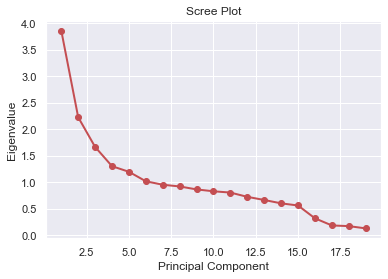

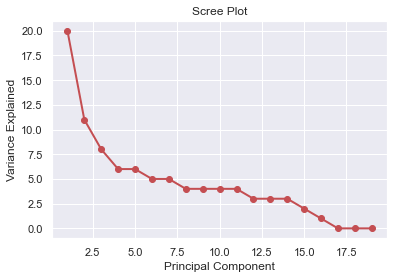

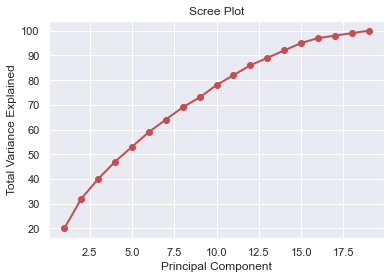

        LOAN   M_VALUE  IMP_VALUE  M_MORTDUE  IMP_MORTDUE     M_YOJ   IMP_YOJ  \
0  -0.074072  0.055330  -0.106770   0.208888    -0.074417  0.239101 -0.061422   
1   0.275961 -0.111795   0.563897  -0.122236     0.545642 -0.005168  0.011279   
2  -0.067142  0.302497  -0.035048  -0.126704     0.063787 -0.098655 -0.103501   
3  -0.079332 -0.278388   0.088251  -0.151589     0.084182 -0.085359 -0.532527   
4   0.434672  0.173232   0.149805   0.493927     0.187743  0.408621 -0.164896   
5   0.315218 -0.262351  -0.213728   0.023796    -0.311219  0.252515  0.297882   
6   0.410113  0.310397   0.071242  -0.174575     0.005282 -0.320447  0.481920   
7   0.063584  0.516360  -0.127651   0.050887     0.028691  0.169879 -0.186084   
8  -0.168885 -0.341729   0.114852  -0.030379    -0.010459  0.309766  0.159788   
9   0.173780  0.044452  -0.017677  -0.459836    -0.158033  0.105470  0.030610   
10  0.131819 -0.393433   0.137177   0.081735     0.017194 -0.034273  0.188370   
11  0.319657 -0.066436  -0.0

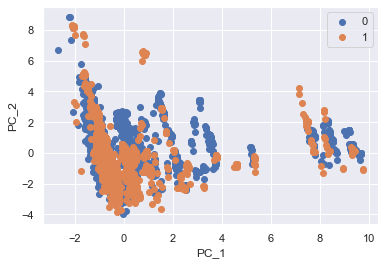

In [15]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df

# FILE   = "HMEQ_Loss.csv"


# df = pd.read_csv( FILE, encoding="ISO-8859-1" )
TARGET1 = "TARGET_BAD_FLAG"
TARGET2 = "TARGET_LOSS_AMT"
CAT1 = "z_IMP_REASON_HomeImp"
CAT2 = "z_IMP_JOB_Mgr"
CAT3 = "z_IMP_JOB_Office"
CAT4 = "z_IMP_JOB_Other"
CAT5 = "z_IMP_JOB_ProfExe"
CAT6 = "z_IMP_JOB_Sales"
CAT7 = "z_IMP_JOB_Self"
CAT8 = "z_IMP_REASON_MISSING"



X = df.copy()
X = X.drop( [TARGET1,TARGET2,CAT1,CAT2,CAT3,CAT4,CAT5,CAT6,CAT7,CAT8], axis=1 )
varNames = X.columns

print( X.head() )
print( "\n\n")

theScaler = StandardScaler()
theScaler.fit( X )

X_STD = theScaler.transform( X )


MAX_N = X_STD.shape[1]
pca = PCA(n_components=MAX_N)
pca.fit( X_STD )



ev = pca.explained_variance_
print("Eigen Values")
print(ev)
print("\n\n")


varPCT = []
totPCT = []
total = 0
for i in ev:
    total = total + i
    VAR = int( i / len(ev) * 100)
    PCT = int( total / len(ev) * 100)
    varPCT.append(VAR)
    totPCT.append( PCT )
    print( round(i,2), "variation=", VAR,"%"," total=", PCT,"%")


PC_NUM = np.arange( MAX_N ) + 1
plt.plot( PC_NUM , ev, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

PC_NUM = np.arange( MAX_N ) + 1
plt.plot( PC_NUM , varPCT, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


PC_NUM = np.arange( MAX_N ) + 1
plt.plot( PC_NUM , totPCT, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Total Variance Explained')
plt.show()




dfc = pd.DataFrame( pca.components_ )
dfc.columns = list( X.columns)
print( dfc )

pca = PCA(n_components=MAX_N)
pca.fit( X_STD )


X_PCA = pca.transform( X_STD )
X_PCA = pd.DataFrame( X_PCA )
X_PCA = X_PCA.iloc[:,0:2]


colNames = X_PCA.columns
pcaNames = []
for i in colNames :
    index = int(i) + 1
    theName = "PC_" + str(index)
    pcaNames.append( theName )
    
X_PCA.columns = pcaNames

print( X_PCA.head() )
print("\n\n")


print( df.head() )
print("\n\n")

X_PCA["TARGET"] = df.z_IMP_REASON_HomeImp
print( X_PCA.head() )
print("\n\n")



for Name, Group in X_PCA.groupby(["TARGET"]):
    print( Group.head() )
    print("\n")
    

for Name, Group in X_PCA.groupby(["TARGET"]):
    plt.scatter(Group.PC_1, Group.PC_2, label=Name)
plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.legend()
plt.show()



